# Simple 1D Random Walk

The simplest random walk consists of a walker that moves left or right by a discrete distance of $\pm{1}$ at each step with equal probability of moving in either direction. 

Each step is defined: $$x_{n}=x_{n-1}+\Delta{x}$$

where $\Delta{x}$ is a random variable that can be either $+1$ or $-1$. 

In [ ]:
# Simple 1D random walk

import numpy as np
import matplotlib.pyplot as plt

# Parameters
num_steps=1000 # The number of steps in the walk

# Model
steps=np.random.choice([-1, 1], size=num_steps)
position=np.cumsum(steps)

# Plotting
plt.plot(position)
plt.xlabel('steps')
plt.ylabel('position')
plt.show()

## Scaling to time

The model is time independent in its current form. Let's define a timestep $\tau$ such that $$t=n\tau$$

where t is time in seconds, n is the number of steps, and $\tau$ is the time required to move one full step. 

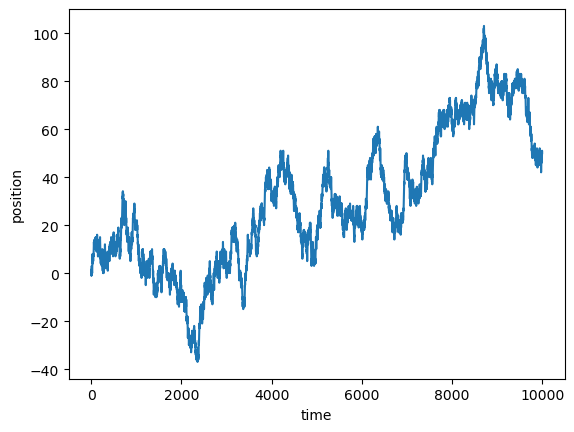

In [21]:
# Simple 1D random walk scaled to time

import numpy as np
import matplotlib.pyplot as plt

# Parameters
num_steps=10**5 # The number of steps in the walk
time_step = 0.1 # Time required for one full step

# Model
t=int(num_steps * time_step)

steps=np.random.choice([-1, 1], size=t)

position=np.cumsum(steps)

# Plotting
plt.plot(position)
plt.xlabel('time')
plt.ylabel('position')
plt.show()

## Expectation and Variance

The expectation of the position of the random walker is given by the general relation

$$E(X)=\sum{xP(x_{i})}$$ 

and after one step

$$E(X_{1})=(1)\times\frac{1}{2}+(-1)\times\frac{1}{2} = 0$$

The expectation after N steps is given by $$E(X_{N})=\sum_{i=1}^N {E(\Delta{x_{i}}})$$

Note that this can be scaled to time with $t=N\tau$. 

In addition to the expected value of the random walk at after a certain number of steps or a given time, we are also interested in the variance of the walk and how that variance might change over the duration of the walk. 

The variance for a single step is defined $$VAR(\Delta{x})=E(\Delta{x^{2}})-E(\Delta{x})^{2}) = (1)^{2}\times\frac{1}{2}+(-1)^{2}\times\frac{1}{2} - (0)^{2} = 1$$

The variance after N steps is $$\sum_{i=1}^N{VAR(X_{N})}=N\times{1}$$

So as the walk evolves, the expected (average) position is 0, but the variance grows approximately linearly with time or the number of steps. The variance is also known as the mean squared displacement.

The standard deviation grows as the $\sqrt{N}$

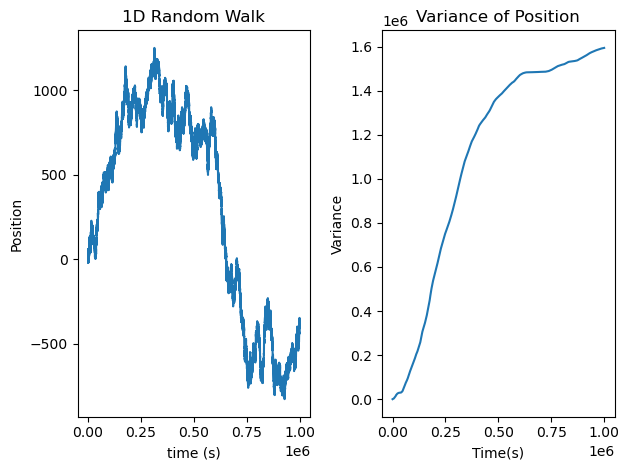

In [32]:
# Position and Variance of a simple 1D random walk

import numpy as np
import matplotlib.pyplot as plt

# Parameters
num_steps=10**7 # The number of steps in the walk
time_step = 0.1 # Time required for one full step

# Model
t=int(num_steps * time_step)

steps=np.random.choice([-1, 1], size=t)

position=np.cumsum(steps)

squared_displacement=position ** 2
variance=np.cumsum(squared_displacement / np.arange(1, t + 1))

# Plot the random walk position
plt.subplot(1, 2, 1)
plt.plot(position)
plt.title("1D Random Walk")
plt.xlabel("time (s)")
plt.ylabel("Position")

# Plot the variance over steps
plt.subplot(1, 2, 2)
plt.plot(variance)
plt.title("Variance of Position")
plt.xlabel("Time(s)")
plt.ylabel("Variance")

plt.tight_layout()
plt.show()

## Adding Plot Animation

In [ ]:
# Position and Variance of a simple 1D random walk

import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from IPython.display import Video

# Parameters
num_steps=10**3 # The number of steps in the walk
time_step = 0.1 # Time required for one full step
t=int(num_steps * time_step)

# Model

steps=np.random.choice([-1, 1], size=t)

position=np.cumsum(steps)

squared_displacement=position ** 2
variance=np.cumsum(squared_displacement / np.arange(1, t + 1))


# Animated Plots
with plt.style.context("dark_background"):
    # Set up the figure and axes
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

    # Initialize lines for position and variance
    line1, = ax1.plot([], [], lw=2)
    line2, = ax2.plot([], [], lw=2)

    # Set up the axes limits and labels
    ax1.set_xlim(0, t)
    ax1.set_ylim(position.min() * 1.1, position.max() * 1.1)
    ax1.set_title("1D Random Walk")
    ax1.set_xlabel("Time (s)")
    ax1.set_ylabel("Position")

    ax2.set_xlim(0, t)
    ax2.set_ylim(0, variance.max() * 1.1)
    ax2.set_title("Variance of Position")
    ax2.set_xlabel("Time (s)")
    ax2.set_ylabel("Variance")

    # Initialization function to clear the data at the start of the animation
    def init():
        line1.set_data([], [])
        line2.set_data([], [])
        return line1, line2

    # Update function for each frame
    def update(frame):
        # Update position line (up to current frame)
        line1.set_data(np.arange(frame), position[:frame])
    
        # Update variance line (up to current frame)
        line2.set_data(np.arange(frame), variance[:frame])
    
        return line1, line2

    # Create the animation
    ani = FuncAnimation(fig, update, frames=np.arange(1, t, int(t / 100)),  # Use a subset of frames
                    init_func=init, blit=False, interval=10)


    # Save the animation as an MP4 using ffmpeg
    ani.save("random_walk_dark.mp4", writer="ffmpeg", fps=30)

# Display the saved video in Jupyter Notebook (optional)
Video("random_walk_dark.mp4", embed=True)

## Probability Mass Function (PMF) for Position

After N steps, the position is $$X_N=\sum_{i=1}^N{\Delta{x_i}}$$

Since each step in the simple random walk is either {$+1, -1$}, $X_N$ will be an integer between $\pm{N}$.

Each possible position after N steps, $X_N=k$ results from taking $N_+$ steps forward (each at a value of +1) and $N_-=N-N_{+}$ steps backward (each at a value of -1).

So, $k=N_{+}-N_{-}$, where $k$ is the final position after N steps. For example, if four $N_+$ steps were taken, and two $N_-$ steps, then $k=4-2=2$

After an even number of steps, the position $(k)$ must be even, after an off number of steps, the $(k)$ must be odd.

So, $$N_+=\frac{N+k}{2}$$

and, $$N_-=\frac{N-k}{2}$$

The probability of $X_N=k$ is given by the [binomial distribution](https://en.wikipedia.org/wiki/Binomial_distribution)

$$P(X_N=k)=\binom{N}{N_+}\frac{1}{2}^N$$

Substituting the above terms, we have $$P(X_N=k)=\binom{N}{\frac{N+k}{2}}\frac{1}{2}^N$$ 

For large N, the probability of observing the walker at a particular position becomes approximately normally distributed. The approximate PMF then becomes $$P(X_N=k)=\frac{1}{\sqrt{2\pi{N}}}e^{\frac{-k^2}{2N}}$$

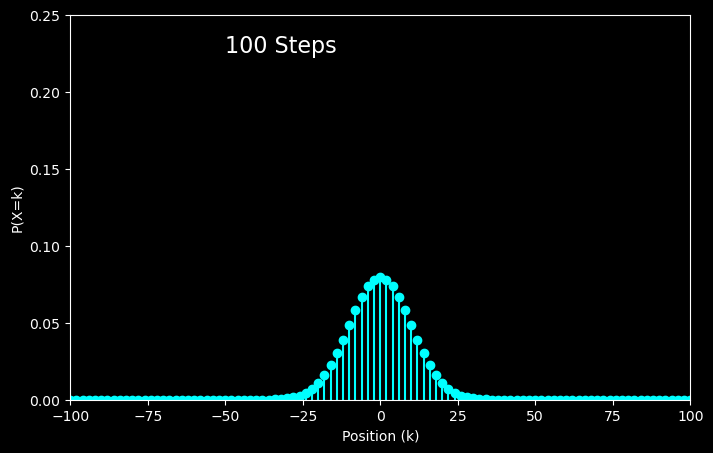

In [70]:
# Plot the PMF
import numpy as np
import matplotlib.pyplot as plt
from scipy.special import comb
from matplotlib.animation import FuncAnimation
from IPython.display import Video

def pmf_random_walk(N):
    # Possible positions (only even or odd positions, depending on N)
    k_values = np.arange(-N, N + 1, 2)  # Positions reachable with N steps
    pmf_values = []

    for k in k_values:
            if (N + k) % 2 == 0:  # Ensure that (N + k) is even
                N_plus = (N + k) // 2  # Number of +1 steps required
                # Calculate PMF using the binomial coefficient
                pmf_k = comb(N, N_plus) * (0.5 ** N)
                pmf_values.append(pmf_k)
            else:
                pmf_values.append(0)  # Position not reachable for this N

    return k_values, pmf_values

# Parameters
N_max = 100 # Maximum number of steps in the random walk

# Apply the dark background style
with plt.style.context("dark_background"):
    # Set up the figure
    fig, ax = plt.subplots(figsize=(8, 5))
    
    # Initialize plot elements
    stem_line, = ax.plot([], [], marker='o', color='cyan', linestyle="none")  # PMF points
    ax.vlines([], ymin=0, ymax=[], color='cyan')  # PMF stems
    title = ax.text(0.25, 0.95, "", ha="left", va="top", transform=ax.transAxes, color="white", fontsize=16)
    ax.set_xlim(-N_max, N_max)
    ax.set_ylim(0, 0.25)
    ax.set_xlabel("Position (k)", color="white")
    ax.set_ylabel("P(X=k)", color="white")

    # Update function for the animation
    def update(N):
        # Calculate PMF for the current N
        k_values, pmf_values = pmf_random_walk(N)
        
        # Update the plot data
        stem_line.set_data(k_values, pmf_values)
        ax.collections.clear()  # Clear previous vlines
        ax.vlines(k_values, [0], pmf_values, color='cyan')
        
        # Update the title to show current N
        title.set_text(f"{N} Steps")

    # Create the animation
    ani = FuncAnimation(fig, update, frames=np.arange(1, N_max + 1), interval=300)

    # Save the animation as an MP4 using ffmpeg
    ani.save("random_walk_pmf_animation.mp4", writer="ffmpeg", fps=5)

# Display the saved video in Jupyter Notebook (optional)
Video("random_walk_pmf_animation.mp4", embed=True)

## First Passage Time

The expected first passage time is the number of steps (or time) required on average for a random walker to occupy a specified position. 

The expected first passage time is proportional to the square of the position $E(X_T)\propto{x^2}$, implying that further positions take longer to reach. 

`Need to expand on this`

First passage time to reach position 10: 332 steps


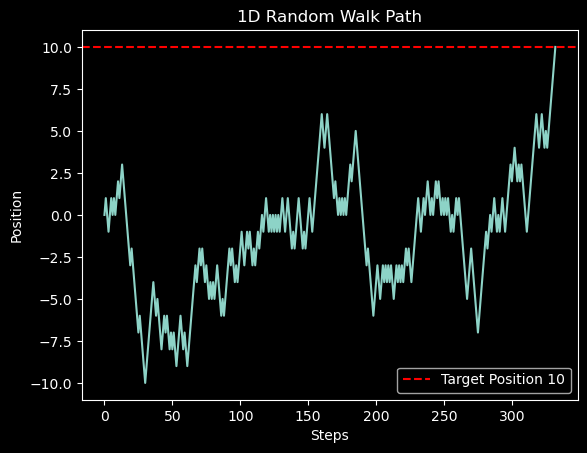

In [78]:
import numpy as np
import matplotlib.pyplot as plt

def simulate_first_passage(target_position, max_steps=10000):
    # Initialize variables
    position = 0  # Start at 0
    steps = 0  # Count the number of steps taken
    
    # Track the random walk's path
    path = [position]
    
    # Perform the random walk
    while position != target_position and steps < max_steps:
        step = np.random.choice([-1, 1])  # Randomly take +1 or -1 step
        position += step
        path.append(position)
        steps += 1
    
    # Check if target was reached within max_steps
    if position == target_position:
        return steps, path
    else:
        return None, path  # If max_steps is reached without hitting target

# Parameters
target_position = 10  # Position we want to reach
max_steps = 10000  # Limit on the number of steps to avoid infinite loops

# Run the simulation
first_passage_time, path = simulate_first_passage(target_position, max_steps)

# Display results
if first_passage_time is not None:
    print(f"First passage time to reach position {target_position}: {first_passage_time} steps")
else:
    print(f"Did not reach position {target_position} within {max_steps} steps")

# Plot the path
plt.style.use('dark_background')
plt.plot(path)
plt.axhline(target_position, color="red", linestyle="--", label=f"Target Position {target_position}")
plt.title("1D Random Walk Path")
plt.xlabel("Steps")
plt.ylabel("Position")
plt.legend()
plt.show()


## A Correlated Random Walk

In a simple random walk the choice of direction at each step ${+1,-1}$ is independent. For a correlated walk, the walkers exhibit persistence $p$. In other words, the probability of choosing one direction or the other depends on their previous choice of direction. 

The persistence probability $p$ denotes the probability of repeating the direction of the last step, while $1-p$ is the probability of choosing the opposite direction.  

When $p=0.5$ the walk is uncorrelated. When $p<0.5$ the walk is negatively correlated and will tend to move in the opposite direction of its previous step. When $p>0.5$ the walk is positively correlated and will tend to move in the direction of its previous step.

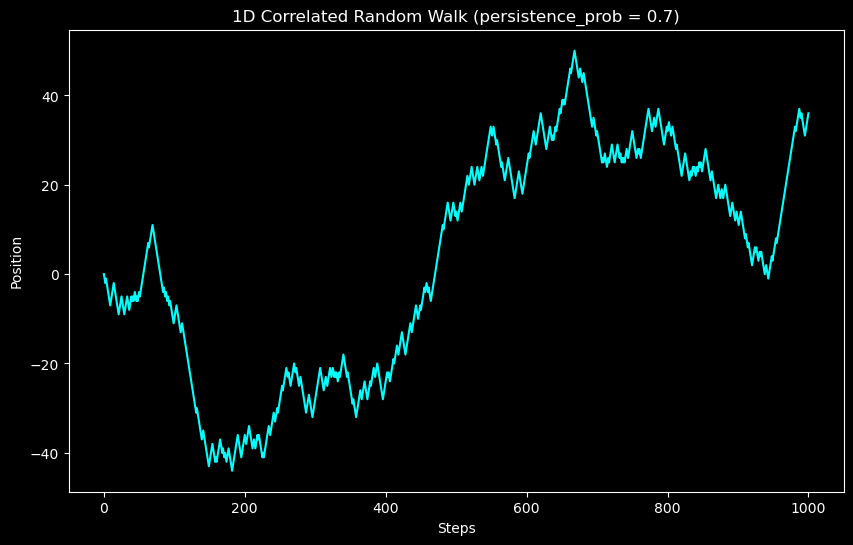

In [91]:
import numpy as np
import matplotlib.pyplot as plt

def correlated_random_walk(num_steps, persistence_prob=0.5):
    # Initialize the starting position and the first step direction
    position = 0
    path = [position]
    
    # Randomly choose the initial step (+1 or -1)
    step = np.random.choice([-1, 1])
    path.append(step)
    position += step
    
    # Perform the correlated walk
    for _ in range(1, num_steps):
        # Decide the next step based on persistence probability
        if np.random.rand() < persistence_prob:
            # Take the same direction as the previous step
            position += step
        else:
            # Switch direction
            step = -step
            position += step
        path.append(position)

    return path

# Parameters
num_steps = 1000  # Total number of steps in the walk
persistence_prob = 0.7  # Probability of repeating the last step

# Simulate the correlated random walk
path = correlated_random_walk(num_steps, persistence_prob)

# Plot the walk
plt.style.use('dark_background')
plt.figure(figsize=(10, 6))
plt.plot(path, color="cyan")
plt.title(f"1D Correlated Random Walk (persistence_prob = {persistence_prob})")
plt.xlabel("Steps")
plt.ylabel("Position")
plt.show()
